# Question No 1 (Company Data)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.drop(columns=['Age', 'Education','US'],inplace=True)

In [5]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban
0,9.50,138,73,11,276,120,Bad,Yes
1,11.22,111,48,16,260,83,Good,Yes
2,10.06,113,35,10,269,80,Medium,Yes
3,7.40,117,100,4,466,97,Medium,Yes
4,4.15,141,64,3,340,128,Bad,Yes
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,Yes
396,6.14,139,23,3,37,120,Medium,No
397,7.41,162,26,12,368,159,Medium,Yes
398,5.94,100,79,7,284,95,Bad,Yes


In [6]:
df['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [7]:
df['Sales'].mean()

7.496325

In [6]:
for x in df['Sales']:
    if x>10:
        df['Sales'].replace(to_replace = x, value = 'high',inplace=True)
    else:
        df['Sales'].replace(to_replace = x, value = 'low',inplace=True)
        
   

In [7]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Urban
0,low,138,73,11,276,120,Bad,Yes
1,high,111,48,16,260,83,Good,Yes
2,high,113,35,10,269,80,Medium,Yes
3,low,117,100,4,466,97,Medium,Yes
4,low,141,64,3,340,128,Bad,Yes
...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,Yes
396,low,139,23,3,37,120,Medium,No
397,low,162,26,12,368,159,Medium,Yes
398,low,100,79,7,284,95,Bad,Yes


In [8]:
df=pd.get_dummies(df,columns=['ShelveLoc','Urban'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,low,138,73,11,276,120,0,0,1
1,high,111,48,16,260,83,1,0,1
2,high,113,35,10,269,80,0,1,1
3,low,117,100,4,466,97,0,1,1
4,low,141,64,3,340,128,0,0,1
...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,0,1
396,low,139,23,3,37,120,0,1,0
397,low,162,26,12,368,159,0,1,1
398,low,100,79,7,284,95,0,0,1


In [9]:
label_encoder = preprocessing.LabelEncoder()
df['Sales']= label_encoder.fit_transform(df['Sales'])

In [10]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,1,138,73,11,276,120,0,0,1
1,0,111,48,16,260,83,1,0,1
2,0,113,35,10,269,80,0,1,1
3,1,117,100,4,466,97,0,1,1
4,1,141,64,3,340,128,0,0,1
...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,0,1
396,1,139,23,3,37,120,0,1,0
397,1,162,26,12,368,159,0,1,1
398,1,100,79,7,284,95,0,0,1


In [11]:
x=df.iloc[:,1:9]
y=df['Sales']

In [12]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes
0,138,73,11,276,120,0,0,1
1,111,48,16,260,83,1,0,1
2,113,35,10,269,80,0,1,1
3,117,100,4,466,97,0,1,1
4,141,64,3,340,128,0,0,1
...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,0,1
396,139,23,3,37,120,0,1,0
397,162,26,12,368,159,0,1,1
398,100,79,7,284,95,0,0,1


In [13]:
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [14]:
df['Sales'].unique()

array([1, 0])

In [15]:
df.Sales.value_counts()

1    322
0     78
Name: Sales, dtype: int64

In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

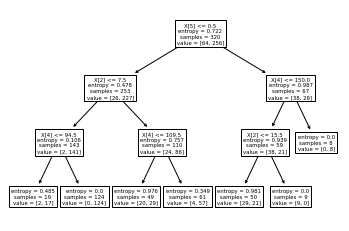

In [18]:
#PLot the decision tree
tree.plot_tree(model);


In [19]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_Yes']

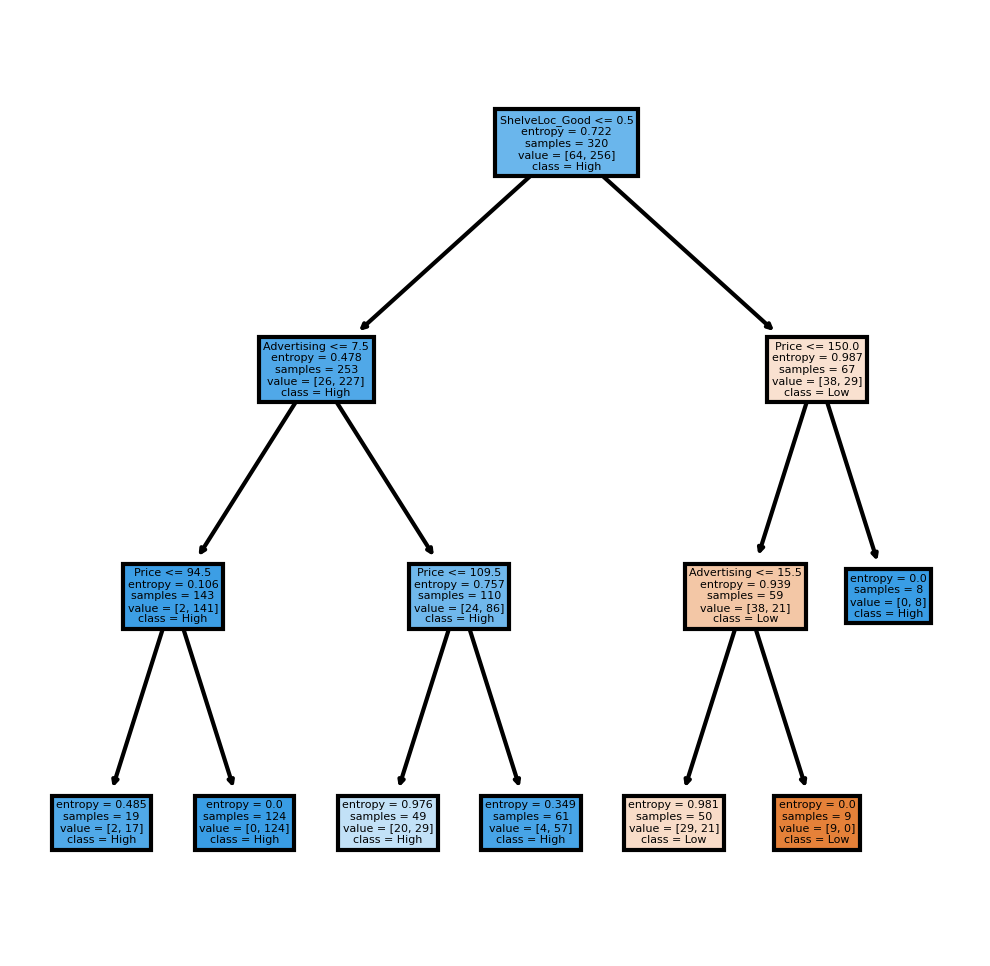

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes']
cn=['Low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    63
0    17
dtype: int64

In [22]:
preds

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,8,6
1,9,57


In [24]:
# Accuracy 
np.mean(preds==y_test)

0.8125

In [25]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.8125